In [1]:
#import libraries
import numpy as np
import pandas as pd
import pycaret as pc
import matplotlib.pyplot as plt
import graphAnalysis #self made function
import countColumns #self made function
import seaborn as sns
import warnings
import IPython as ipy
import joblib
warnings.filterwarnings('ignore')

#### DIsplay of Case Study

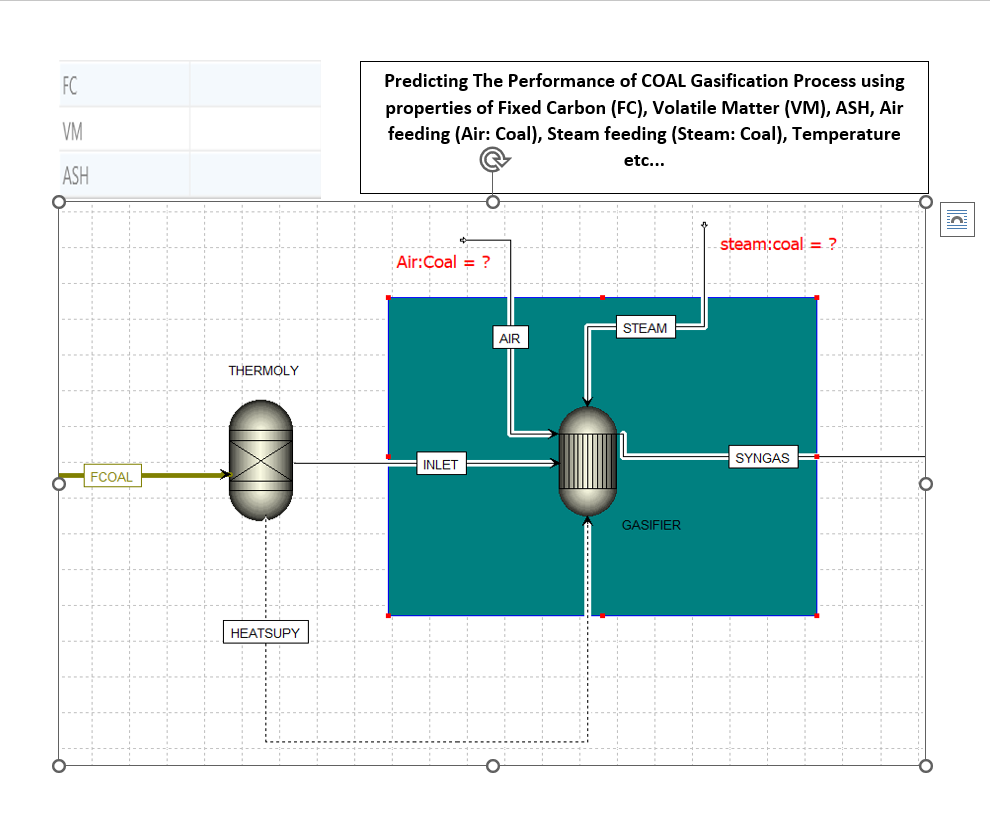

In [2]:
ipy.display.Image(r'C:\Users\Joe\Desktop\coding\Matlab Revise\three.png')

In [3]:
# dataset was compiled from the source
# Development of data-driven models for fluidized-bed coal gasification process
# link
# Features : Fixed carbon to Gas Produced
# Label class: Heat Value
df = pd.read_csv('dataset.csv')
df.head()

,Fixed Carbon (FC),Volatile Matter (VC),ASH (MM),Air Feeding (Nm^3/Kg),Steam Feeding (kg/kg),Temperature (C),Heat Value (MJ/m^3)
0,26.89,33.20,39.91,1.93,0.35,904,4.14
1,26.89,33.20,39.91,1.98,0.35,910,4.70
2,26.89,33.20,39.91,2.09,0.44,888,3.96
3,26.89,33.20,39.91,2.10,0.37,907,4.42
4,27.31,49.56,23.14,2.41,0.43,912,4.23


In [4]:
round((df['Fixed Carbon (FC)']),1)

0      26.9
1      26.9
2      26.9
3      26.9
4      27.3
       ... 
101    25.8
102    25.8
103    25.8
104    25.8
105    25.8
Name: Fixed Carbon (FC), Length: 106, dtype: float64

In [5]:
countColumns.NumberOfColumns(df=df)

0 Fixed Carbon (FC)
1 Volatile Matter (VC)
2 ASH (MM)
3 Air Feeding (Nm^3/Kg)
4 Steam Feeding (kg/kg)
5 Temperature (C)
6 Heat Value (MJ/m^3)
The shape of the data is:  (106, 7)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fixed Carbon (FC)      106 non-null    float64
 1   Volatile Matter (VC)   106 non-null    float64
 2   ASH (MM)               106 non-null    float64
 3   Air Feeding (Nm^3/Kg)  106 non-null    float64
 4   Steam Feeding (kg/kg)  106 non-null    float64
 5   Temperature (C)        106 non-null    int64  
 6   Heat Value (MJ/m^3)    106 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 5.9 KB


In [7]:
df.describe()

,Fixed Carbon (FC),Volatile Matter (VC),ASH (MM),Air Feeding (Nm^3/Kg),Steam Feeding (kg/kg),Temperature (C),Heat Value (MJ/m^3)
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,37.557736,32.821792,29.952075,2.345000,0.351698,858.801887,3.913774
std,11.864188,7.197448,12.024814,0.821092,0.112686,62.143064,0.943080
min,25.830000,21.290000,9.050000,1.340000,0.100000,720.000000,1.420000
25%,26.890000,25.760000,19.290000,1.712500,0.300000,825.000000,3.232500
50%,33.110000,33.200000,33.790000,2.130000,0.340000,850.000000,3.970000
75%,47.582500,36.480000,37.690000,2.535000,0.427500,900.000000,4.687500
max,61.000000,49.560000,49.980000,5.840000,0.630000,980.000000,5.500000


##### Using Pycaret Low Code Machine Learning

In [8]:
from pycaret.regression import *

In [33]:
exp = setup(data=df,target='Heat Value (MJ/m^3)', normalize=False,remove_outliers=True,silent=True,session_id=149)

,Description,Value
0,session_id,149
1,Target,Heat Value (MJ/m^3)
2,Original Data,"(106, 7)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(70, 6)"


In [34]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.3246,0.1916,0.4275,0.4728,0.0928,0.0904,0.0950
et,Extra Trees Regressor,0.2995,0.1636,0.3847,0.4679,0.0843,0.0836,0.0850
knn,K Neighbors Regressor,0.4057,0.2966,0.5033,0.4469,0.1086,0.1140,0.0110
xgboost,Extreme Gradient Boosting,0.3210,0.1764,0.4074,0.4268,0.0874,0.0869,0.0350
ada,AdaBoost Regressor,0.3366,0.2087,0.4467,0.3310,0.0971,0.0946,0.0330
ridge,Ridge Regression,0.3534,0.2242,0.4577,0.2309,0.0974,0.0949,0.0090
br,Bayesian Ridge,0.3576,0.2263,0.4603,0.2266,0.0980,0.0961,0.0070
lr,Linear Regression,0.3632,0.2337,0.4687,0.2246,0.0998,0.0983,0.0090
omp,Orthogonal Matching Pursuit,0.4488,0.3176,0.5503,0.1807,0.1177,0.1220,0.0060
gbr,Gradient Boosting Regressor,0.3442,0.2270,0.4620,0.1747,0.0985,0.0933,0.0230


In [11]:
model = create_model(best)
print(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3725,0.2552,0.5052,0.6389,0.1139,0.1136
1,0.2735,0.1363,0.3692,0.5792,0.0756,0.0724
2,0.2946,0.1719,0.4146,0.6994,0.0864,0.0823
3,0.6173,0.5665,0.7527,0.4303,0.1716,0.1976
4,0.5142,0.4246,0.6516,0.4234,0.1342,0.1261
5,0.2730,0.1029,0.3208,0.8016,0.0651,0.0723
6,0.2751,0.0937,0.3061,0.8687,0.0684,0.0792
7,0.2713,0.1604,0.4004,0.4871,0.0689,0.0547
8,0.2958,0.1069,0.3269,0.8181,0.0669,0.0747


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=5652, verbose=0, warm_start=False)


In [12]:
#Extracting parameters from pycaret's experiment
X = get_config(variable='X')
#X.head()
X_test = get_config(variable='X_test')
X_train = get_config(variable='X_train')
y_train= get_config(variable='y_train')
y_trained= get_config(variable='y_train')
y_test= get_config(variable='y_test')
#X_test.head()
y_test = pd.DataFrame(y_test).reset_index(drop=True)
y_trained = pd.DataFrame(y_trained).reset_index(drop=True)
#y_test 

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(model,X_train,y_train)
cross_val_score.mean() # answer is above average ~80%

0.6539515066614732

In [14]:
# Function to display box plot and dispplot
def distp_plot(df):
    for col in df.columns:
        plt.figure(figsize=(10,5))
        plt.subplot(1,1,1)
        sns.distplot(df[col])
        plt.show()
def box_plot(df):
    for col in df.columns:
        plt.figure(figsize=(10,5))
        plt.subplot(1,1,1)
        sns.boxplot(df[col])
        plt.show()

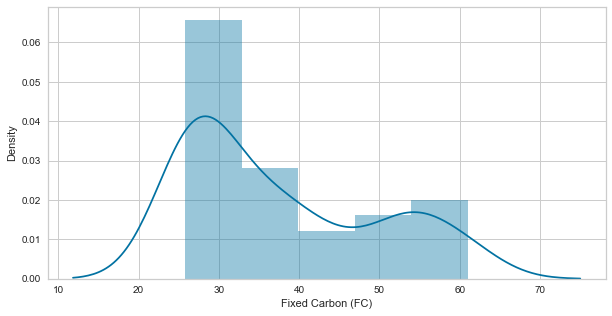

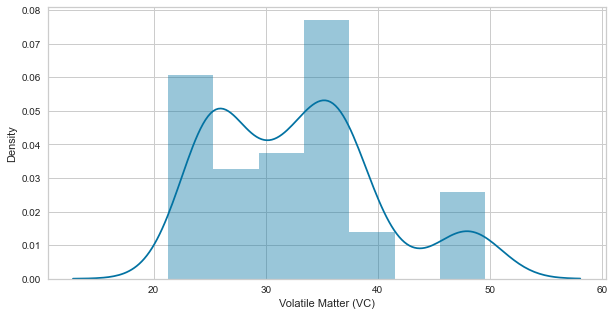

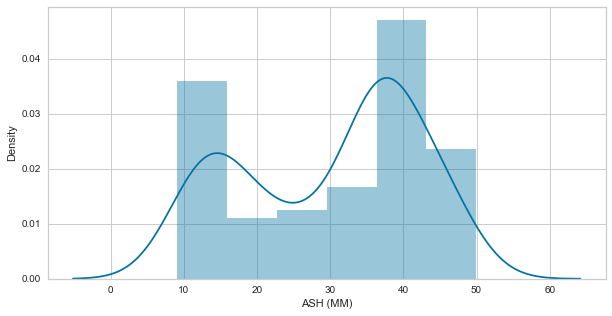

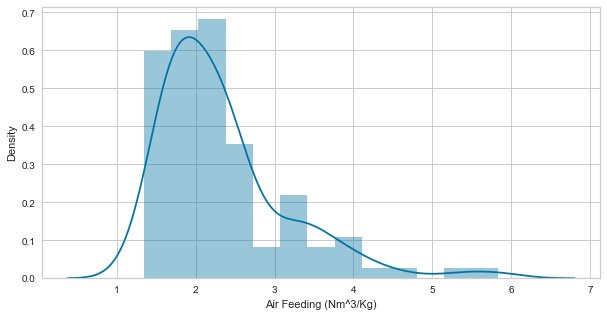

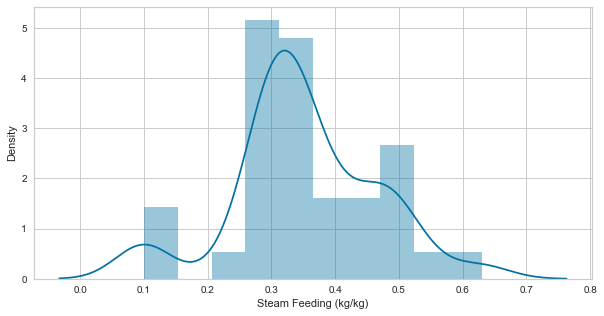

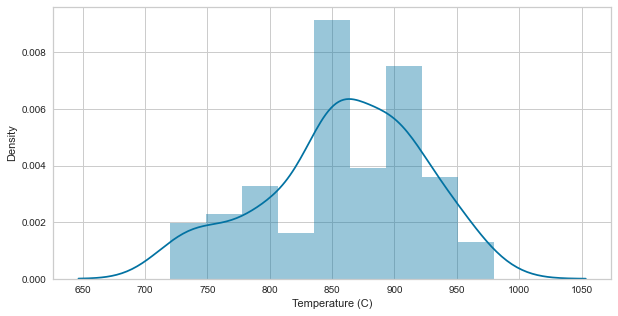

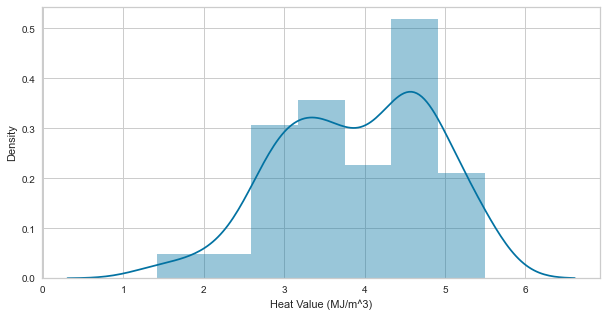

In [15]:
distp_plot(df=df)

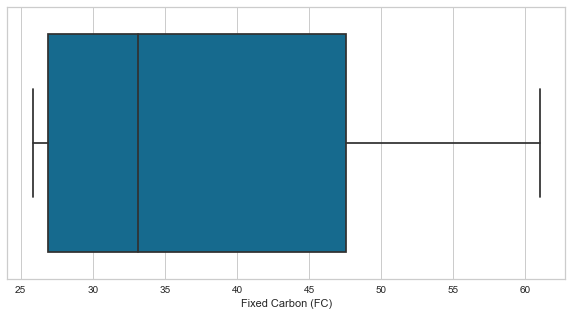

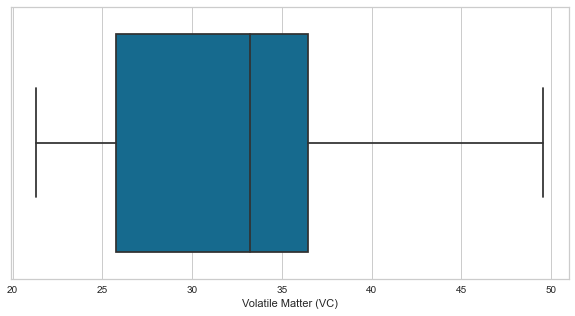

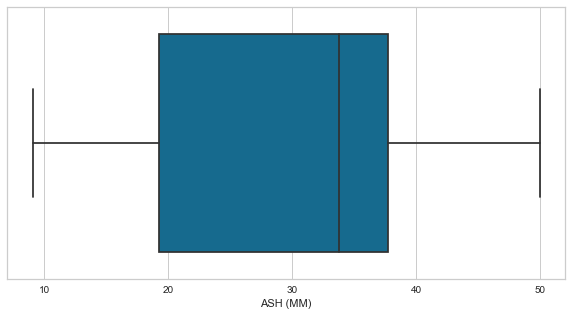

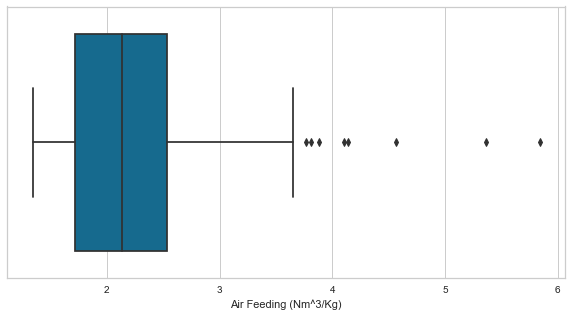

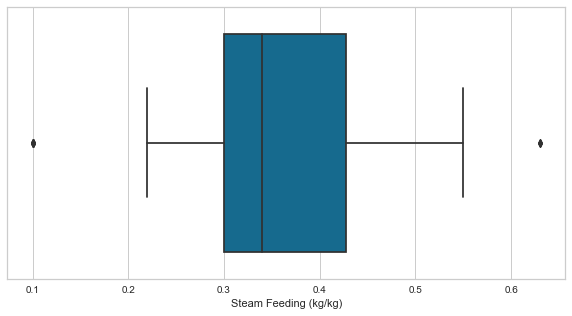

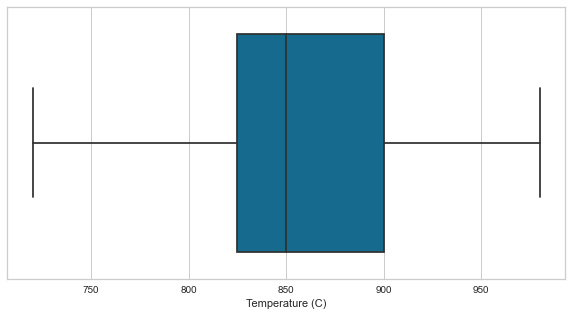

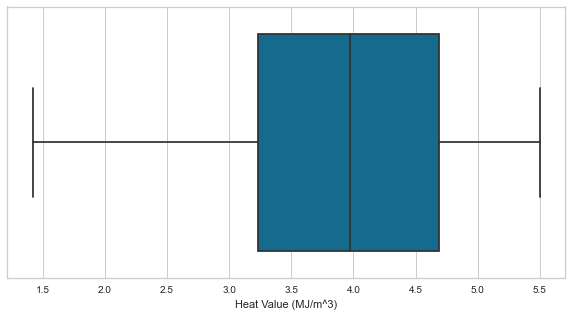

In [16]:
box_plot(df=df)

#### Various Visualization Plots

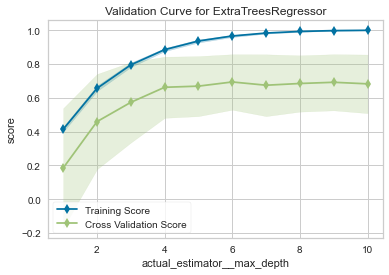

In [17]:
#Trianing score vs cross val score
plot_model(model,plot='vc')

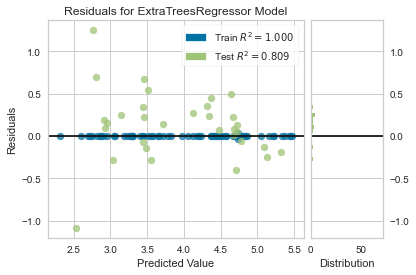

In [18]:
#Training and Test Rsquared
plot_model(model,plot='residuals')

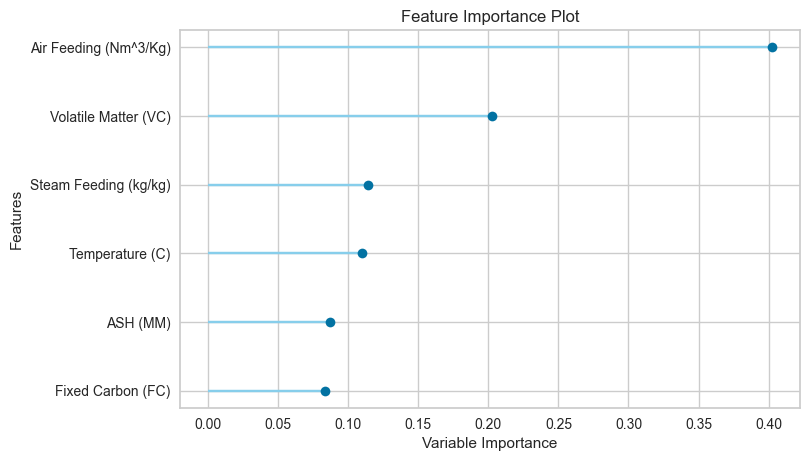

In [19]:
#Feature Importance
plot_model(model,plot='feature')

##### Predicting values(x_test) using the model

In [20]:
predict_model(model,drift_report=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.3059,0.1728,0.4157,0.8088,0.1092,0.1039


,Fixed Carbon (FC),Volatile Matter (VC),ASH (MM),Air Feeding (Nm^3/Kg),Steam Feeding (kg/kg),Temperature (C),Heat Value (MJ/m^3),Label
0,61.000000,25.100000,13.900000,3.47,0.48,850.0,3.10,3.44000
1,25.830000,36.480000,37.689999,1.76,0.24,902.0,3.93,4.37305
2,54.889999,31.020000,15.080000,2.66,0.38,900.0,2.90,3.14340
3,33.110001,47.580002,19.290001,2.84,0.10,850.0,2.80,2.94960
4,49.880001,41.060001,9.050000,3.77,0.42,850.0,3.62,2.53530
5,29.750000,25.049999,45.209999,1.68,0.37,850.0,4.44,4.66405
6,29.750000,25.049999,45.209999,1.66,0.30,950.0,4.41,4.48390
7,40.610001,31.590000,27.799999,1.96,0.32,725.0,5.38,5.13590
8,25.830000,36.480000,37.689999,2.35,0.53,932.0,3.32,3.03440
9,26.889999,33.200001,39.910000,1.93,0.35,904.0,4.14,4.63770


##### Saving the model with pipeline

In [21]:
save_model(model,'savedmodel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='Heat Value (MJ/m^3)',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=N

##### Saving just the model

In [22]:
joblib.dump(model,'gasificationmodel.pkl')

['gasificationmodel.pkl']

##### Load the model

In [23]:
loaded_model = load_model('savedmodel')

Transformation Pipeline and Model Successfully Loaded


In [24]:
model_gasification = joblib.load('gasificationmodel.pkl')
model_gasification.fit(X_train.values,y_train.values)
model_gasification.score(X_test,y_test)

0.8088104221196278

In [25]:
####Testing loaded_model with extracted x_test from pycaret
#X_test
y_predicted = loaded_model.predict(X_test)
Predicted_Heat_Value  = pd.DataFrame(y_predicted,columns=['Predicted Heat Value (MJ/m^3)'])
Predicted_Heat_Value.head()
y_test_df = y_test

In [26]:
#Merging y_test and y_predicted
merged = pd.concat([y_test_df,Predicted_Heat_Value],axis=1)
merged

,Heat Value (MJ/m^3),Predicted Heat Value (MJ/m^3)
0,3.10,3.44000
1,3.93,4.37305
2,2.90,3.14340
3,2.80,2.94960
4,3.62,2.53530
5,4.44,4.66405
6,4.41,4.48390
7,5.38,5.13590
8,3.32,3.03440
9,4.14,4.63770


##### Visualizing Actual Value versus Prediced Value

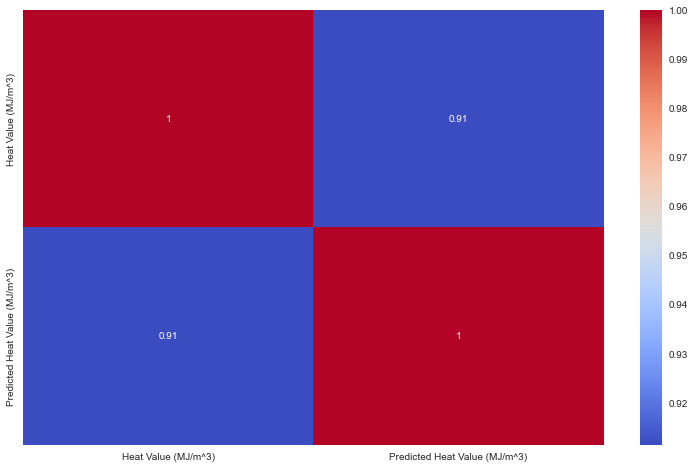

In [27]:
#Correlation plot
plt.figure(figsize=(13,8))
sns.heatmap(merged.corr(), cmap='coolwarm', annot=True)
plt.show()

In [28]:
#Manual submission of imputs for predictions
#Recall columns
features = countColumns.NumberOfColumns(df=df)

0 Fixed Carbon (FC)
1 Volatile Matter (VC)
2 ASH (MM)
3 Air Feeding (Nm^3/Kg)
4 Steam Feeding (kg/kg)
5 Temperature (C)
6 Heat Value (MJ/m^3)
The shape of the data is:  (106, 7)


In [29]:
X_train

,Fixed Carbon (FC),Volatile Matter (VC),ASH (MM),Air Feeding (Nm^3/Kg),Steam Feeding (kg/kg),Temperature (C)
70,54.889999,31.020000,15.080000,3.35,0.38,900.0
93,25.830000,36.480000,37.689999,2.39,0.32,890.0
3,26.889999,33.200001,39.910000,2.10,0.37,907.0
7,28.730000,21.290001,49.980000,1.34,0.25,850.0
24,33.110001,47.580002,19.290001,2.19,0.10,750.0
...,...,...,...,...,...,...
89,25.830000,36.480000,37.689999,2.09,0.33,882.0
100,25.830000,36.480000,37.689999,2.28,0.49,941.0
29,33.110001,47.580002,19.290001,2.98,0.10,840.0
71,54.889999,31.020000,15.080000,4.10,0.29,900.0


##### Note: Sum of Fixed Carbon,Volatile Matter  and ASH =100%

In [30]:
#input parameters
inputs = [[60,20,20,2.4,0.24,1000]]

In [31]:
def predict(data):
    mode = model_gasification.predict(data)
    ans =  mode[0]
    fin = round((ans),3)
    print(f'The Predicted Heating Value is ' + str(fin) )
  

In [32]:
predict(data=inputs)

The Predicted Heating Value is 3.444
